# Clustering - Cereals Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading data

In [2]:
cereals = pd.read_csv("Cereals.csv")
cereals.head()

,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


### Aggregating "name", "shelf" and "rating" to make labels

In [3]:
# Combining the attributes 
cereals['label'] = cereals['name']+ ' (' + cereals['shelf'].astype(str) + " - " + round(cereals['rating'],2).astype(str) + ')'

# Drop original attributes
cereals.drop(['name','shelf','rating'], axis=1, inplace=True)

# Data Exploration

In [4]:
cereals.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups,label
0,70,4,1,130,10.0,5.0,6.0,280.0,25,1.0,0.33,100%_Bran (3 - 68.4)
1,120,3,5,15,2.0,8.0,8.0,135.0,0,1.0,1.00,100%_Natural_Bran (3 - 33.98)
2,70,4,1,260,9.0,7.0,5.0,320.0,25,1.0,0.33,All-Bran (3 - 59.43)
3,50,4,0,140,14.0,8.0,0.0,330.0,25,1.0,0.50,All-Bran_with_Extra_Fiber (3 - 93.7)
4,110,2,2,200,1.0,14.0,8.0,NaN,25,1.0,0.75,Almond_Delight (3 - 34.38)


### Check summary statistics

In [5]:
cereals.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups
count,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,76.000000,75.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,28.246753,1.029610,0.821039
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.907326,4.378656,70.410636,22.342523,0.150477,0.232716
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,0.500000,0.250000
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,25.000000,1.000000,0.670000
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,1.000000,0.750000
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,1.000000,1.000000
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,1.500000,1.500000


### Decouple label from the features

In [6]:
cereal_label = cereals['label']
cereals = cereals[cereals.columns.difference(['label'])]  ## Select all columns except "label"

### Check missing values

In [7]:
cereals.isnull().sum(axis=0)

calories    0
carbo       1
cups        0
fat         0
fiber       0
potass      2
protein     0
sodium      0
sugars      1
vitamins    0
weight      0
dtype: int64

### Imputation

In [8]:
# As Train/Test is NOT used, direct fit & transform is applied together

from sklearn.preprocessing import Imputer
mean_imputer = Imputer()
imputed_cereals = pd.DataFrame(mean_imputer.fit_transform(cereals),columns=cereals.columns)

### Checking for NAs again

In [9]:
imputed_cereals.isnull().sum(axis=0)

calories    0
carbo       0
cups        0
fat         0
fiber       0
potass      0
protein     0
sodium      0
sugars      0
vitamins    0
weight      0
dtype: int64

In [51]:
imputed_cereals.head()

,calories,carbo,cups,fat,fiber,potass,protein,sodium,sugars,vitamins,weight
0,70.0,5.0,0.33,1.0,10.0,280.000000,4.0,130.0,6.0,25.0,1.0
1,120.0,8.0,1.00,5.0,2.0,135.000000,3.0,15.0,8.0,0.0,1.0
2,70.0,7.0,0.33,1.0,9.0,320.000000,4.0,260.0,5.0,25.0,1.0
3,50.0,8.0,0.50,0.0,14.0,330.000000,4.0,140.0,0.0,25.0,1.0
4,110.0,14.0,0.75,2.0,1.0,98.666667,2.0,200.0,8.0,25.0,1.0


## Standardization

In [10]:
# Standardizing the dataset so to bring them all in same scale. Data INTEGRITY is remained maintained

from sklearn.preprocessing import StandardScaler

standardizer = StandardScaler()
standardizer.fit(imputed_cereals)
std_X = standardizer.transform(imputed_cereals)

std_cereals = pd.DataFrame(std_X, columns=imputed_cereals.columns)

In [11]:
std_cereals.describe()

,calories,carbo,cups,fat,fiber,potass,protein,sodium,sugars,vitamins,weight
count,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01
mean,-1.258012e-16,-4.527403e-16,1.665335e-16,1.013349e-16,1.463476e-16,-4.758099e-17,5.767392e-17,-5.190653e-17,-2.144749e-16,5.190653e-17,-1.982541e-16
std,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00
min,-2.938605e+00,-2.542013e+00,-2.469891e+00,-1.013072e+00,-9.088244e-01,-1.212115e+00,-1.420902e+00,-1.917189e+00,-1.625929e+00,-1.272550e+00,-3.542628e+00
25%,-3.555846e-01,-7.267769e-01,-6.532825e-01,-1.013072e+00,-4.864980e-01,-7.774919e-01,-5.014948e-01,-3.563056e-01,-9.317120e-01,-1.462701e-01,-1.980675e-01
50%,1.610194e-01,-4.606439e-16,-3.072619e-01,-1.298811e-02,-6.417167e-02,-1.255577e-01,4.179123e-01,2.440343e-01,-6.089621e-03,-1.462701e-01,-1.980675e-01
75%,1.610194e-01,5.698204e-01,7.740527e-01,9.870962e-01,3.581547e-01,3.090651e-01,4.179123e-01,6.042382e-01,9.195328e-01,-1.462701e-01,-1.980675e-01
max,2.744040e+00,2.125737e+00,2.936682e+00,3.987349e+00,5.003745e+00,3.351425e+00,3.176134e+00,1.924986e+00,1.845155e+00,3.232570e+00,3.146493e+00


### ******** NOTE ********
### Clustering is an unsupervised method and hence we are not concerned about train-test split or prediction accuracies.

## 1. Agglomerative Clustering (hierarchical)
**Parameter description**

n_clusters : The number of clusters to find.


linkage : {“ward”, “complete”, “average”}

- ward minimizes the variance of the clusters being merged.
- complete uses the maximum distances between all observations of the two sets.
- average uses the average of the distances of each observation of the two sets.

affinity : {“euclidean”, “l1”, “l2”, “manhattan”, “cosine”}

- Metric used to compute the linkage.

<IPython.core.display.Javascript object>


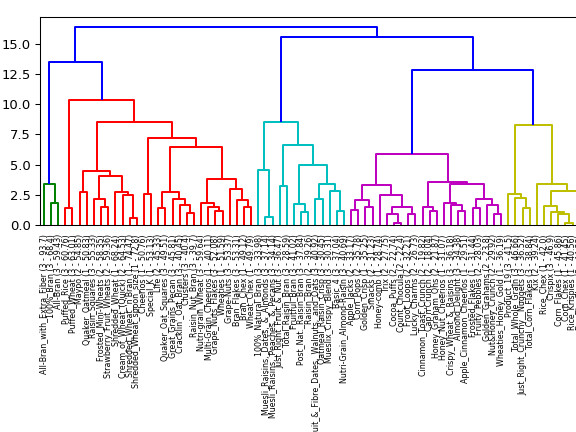

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


In [12]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Preparing linkage matrix
linkage_matrix = linkage(std_cereals, method='ward', metric='euclidean')

# Plot dendogram
import matplotlib.pyplot as plt
%matplotlib notebook

fig, axs = plt.subplots()
dendrogram(linkage_matrix, labels=cereal_label.as_matrix())
plt.tight_layout()
plt.show()

In [13]:
from sklearn.cluster import AgglomerativeClustering

## Instantiating object
agg_clust = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

## Training model and return class labels
agg_clusters = agg_clust.fit_predict(std_cereals)

## Label - Cluster
agg_result = pd.DataFrame({"label": cereal_label, "agg_cluster": agg_clusters}).sort_values('label')
agg_result.head()

,label,agg_cluster
0,100%_Bran (3 - 68.4),3
1,100%_Natural_Bran (3 - 33.98),2
2,All-Bran (3 - 59.43),3
3,All-Bran_with_Extra_Fiber (3 - 93.7),3
4,Almond_Delight (3 - 34.38),4


<IPython.core.display.Javascript object>


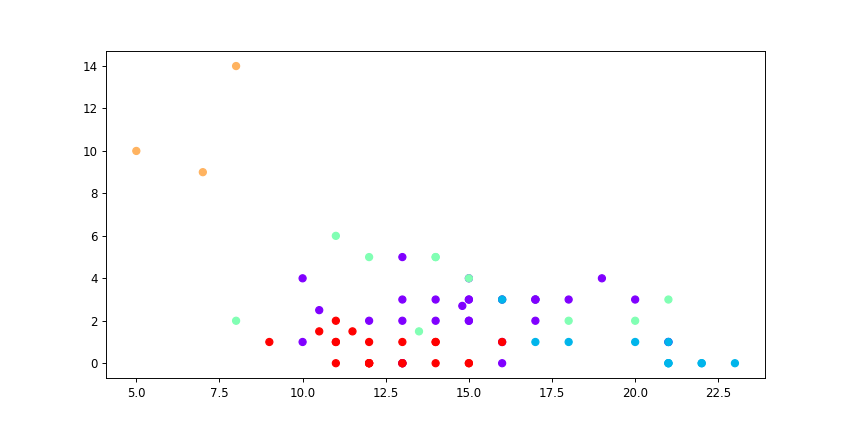

In [79]:
plt.figure(figsize=(10, 5))

plt.scatter(imputed_cereals.iloc[:,1], imputed_cereals.iloc[:,4], c=agg_clust.labels_, cmap='rainbow')

## 2. Agglomerative Clustering (hierarchical) - RandomSearch

## 2. K-Means Clustering
**Parameter description**

n_clusters : The number of clusters to find.

tol : Relative tolerance with regards to inertia to declare convergence

n_init : Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

max_iter : max iterations of recomputing new cluster centroids 

n_jobs : The number of jobs to use for the computation. This works by computing each of the n_init runs in parallel.


In [ ]:
# Randomly selected n-cluster=5 (incorrect approach)

from sklearn.cluster import KMeans

kmeans_object = KMeans(n_clusters=5, random_state=1240)
kmeans_object.fit(std_cereals)
kmeans_clusters = kmeans_object.predict(std_cereals)

kmeans_results = pd.DataFrame({"label": cereal_label, "kmeans_cluster": kmeans_clusters}).sort_values('label')
kmeans_results.head()

### Inspecting cluster centroids to understand average statistics of each cluster

In [ ]:
# Reverse standardized on Kmeans object
cluster_centroids = pd.DataFrame(standardizer.inverse_transform(kmeans_object.cluster_centers_),
                                 columns=cereals.columns)
cluster_centroids

# Export to csv file
#cluster_centroids.to_csv("best_kmeans_cluster_centroids.csv")

### Correct Approach
#### How to select best K value for K-Means => Silhouette Analysis
Smaller the silhouette score better the clustering

In [ ]:
std_cereals.describe()

In [ ]:
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

###################### Just change this to your dataframe
X_matrix = std_cereals.as_matrix()

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]     # best = 9

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 1 column
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(9, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.25, .5])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_matrix) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_matrix)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_matrix, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_matrix, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("For %d clusters, silhouette avg coeff = %f " % (n_clusters,silhouette_avg)),
                 fontsize=14, fontweight='bold')
    plt.show()

### Note - Higher the silhouette score better the clustering.
From above silhouette score, best K value for this dataset is 9

In [ ]:
from sklearn.cluster import KMeans

best_kmeans = KMeans(n_clusters=9, random_state=1240)
best_kmeans.fit(std_cereals)
best_kmeans_labels = best_kmeans.predict(std_cereals)

kmeans_results = pd.DataFrame({"label": cereal_label, "kmeans_cluster": best_kmeans_labels}).sort_values('label')
kmeans_results.head()

In [ ]:
# Export to csv file
kmeans_results.to_csv("Output_Final_Cereals_Clusters.csv", index=False)

### # Do PCA on the data to get the limited varibales to visualize the data (till 3 Numeric variables only can be plotted in graph

In [ ]:
# PCA with 3 features

from sklearn.decomposition import PCA

pca_obj = PCA(n_components=3).fit(std_cereals)
pca_train = pca_obj.transform(std_cereals)

print(pca_obj.explained_variance_ratio_)

In [ ]:
# Plot the graph

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(xs=pca_train[:,0], ys=pca_train[:,1], zs=pca_train[:,2],  c=best_kmeans.labels_, depthshade=False)
plt.show()

In [ ]:
# Combining label and best_kmeans_labels to the dataset

cereals['label'] = cereal_label
cereals['best_kmeans_cluster'] = best_kmeans_labels
print(cereals.head())

In [ ]:
# Export to csv files

cereals.to_csv('cereal_with_cluster_labels.csv')

In [ ]:
import matplotlib.pyplot as plt
%matplotlib notebook

plt.hist(x=cereals['best_kmeans_cluster'], bins='auto', color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Cereals Clusters Histogram')

